In [447]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [398]:
df = pd.read_excel('kiet placement 23-24.xlsx')
df_og = df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 5 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   5.2.1 Number of placement of outgoing students during the year
  1391 non-null   object
 1   Unnamed: 1                                                       1391 non-null   object
 2   Unnamed: 2                                                       1391 non-null   object
 3   Unnamed: 3                                                       1391 non-null   object
 4   Unnamed: 4                                                       1391 non-null   object
dtypes: object(5)
memory usage: 54.5+ KB


In [399]:
df.head()

,5.2.1 Number of placement of outgoing students during the year\n,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Year,Name of student placed and contact details,Program graduated from,Name of the employer with contact details,Pay package at appointment
1,2023-24,ANKITA JAIN,CS,Atlassian eudatarep@atlassian.com,60
2,2023-24,AYUSHI GUPTA,CSE,Atlassian eudatarep@atlassian.com,60
3,2023-24,ISHA RASTOGI,IT,Microsoft AskHR@microsoft.com,52
4,2023-24,SHIFA RIFAT,IT,ServiceNow hr@servicenow.com,42.67


In [400]:
header ={
    '5.2.1 Number of placement of outgoing students during the year\n': 'Year',
    'Unnamed: 1': 'Name',
    'Unnamed: 2': 'Branch',
    'Unnamed: 3': 'Company',
    'Unnamed: 4': 'Package'
}

df = df.rename(columns=header).drop(0)

df.head()

,Year,Name,Branch,Company,Package
1,2023-24,ANKITA JAIN,CS,Atlassian eudatarep@atlassian.com,60
2,2023-24,AYUSHI GUPTA,CSE,Atlassian eudatarep@atlassian.com,60
3,2023-24,ISHA RASTOGI,IT,Microsoft AskHR@microsoft.com,52
4,2023-24,SHIFA RIFAT,IT,ServiceNow hr@servicenow.com,42.67
5,2023-24,AKANKSHA MISHRA,CS,Flipkart info@flipkart.com,32.67


In [401]:
df.tail()

,Year,Name,Branch,Company,Package
1386,2023-24,RAVINDRA KUMAR CHAURASIYA,ME,Gauri component pvt Ltd hr@gauri.com,1.2
1387,2023-24,KIRTI JAYANT,CS,MetaSquare Technologies Pvt. Ltd. ...,1.2
1388,2023-24,VISHESH AGRAWAL,CSE,PRASHVIT DIGITAL hr@pravisht.com,1.2
1389,2023-24,HARSH SAINI,EEE,Shree balaji oil mill info@shreeb...,1.2
1390,2023-24,HAMDAAN AHMAD,CSE,TechUp Labs chirag@techuplabs.com,1.2


In [425]:
def remove_emails(company_name):
  return re.sub(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', '', company_name).strip()


df['Company'] = df['Company'].apply(remove_emails)
df_og = df
df.tail()

,Year,Name,Branch,Company,Package,Concise_Package
1386,2023-24,RAVINDRA KUMAR CHAURASIYA,ME,Gauri component pvt Ltd,1.2,1-3 LPA
1387,2023-24,KIRTI JAYANT,CS,MetaSquare Technologies Pvt. Ltd.,1.2,1-3 LPA
1388,2023-24,VISHESH AGRAWAL,CSE,PRASHVIT DIGITAL,1.2,1-3 LPA
1389,2023-24,HARSH SAINI,EEE,Shree balaji oil mill,1.2,1-3 LPA
1390,2023-24,HAMDAAN AHMAD,CSE,TechUp Labs,1.2,1-3 LPA


In [426]:
df['Package'] = df['Package'].replace('Pay package at appointment', np.nan)
branch_avg = df.groupby('Branch')['Package'].mean()
branch_avg.sort_values(ascending=False)

,Package
Branch,
CS,6.360462
CSE,6.146488
IT,5.904172
CSIT,5.575638
MBA,4.613935
ME,4.563735
EC,4.400602
Civil,4.33963
EEE,3.805447


In [427]:
df[df['Branch']== 'M.Tech']

,Year,Name,Branch,Company,Package,Concise_Package


In [428]:
mask = df['Branch'] != 'M.Tech'
df = df[mask]

In [429]:
branch_avg = df.groupby('Branch')['Package'].mean()
branch_avg = branch_avg.sort_values(ascending=False)
branch_avg = branch_avg.dropna()
branch_avg

,Package
Branch,
CS,6.360462
CSE,6.146488
IT,5.904172
CSIT,5.575638
MBA,4.613935
ME,4.563735
EC,4.400602
Civil,4.33963
EEE,3.805447


Text(0.5, 1.0, 'Average Package per Branch')

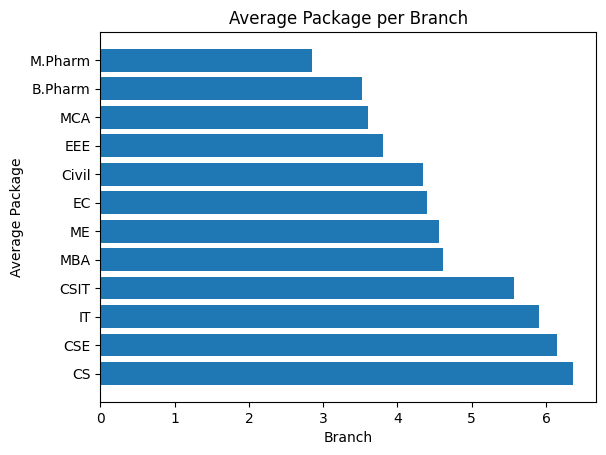

In [430]:
plt.barh(branch_avg.index, branch_avg.values)
plt.xlabel('Branch')
plt.ylabel('Average Package')
plt.title('Average Package per Branch')

In [431]:
comp_high = df.groupby('Package')['Name'].count().sort_values(ascending=False)
mask = comp_high > 0
comp_high = comp_high[mask]
comp_high

,Name
Package,
3.00,149
7.00,130
4.50,128
2.40,70
4.00,70
...,...
20.00,1
24.73,1
32.67,1


Text(0.5, 1.0, 'Number of Packages per CTC')

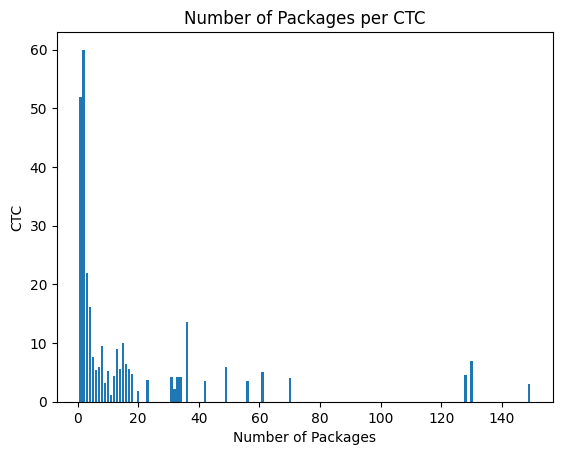

In [521]:
plt.bar(comp_high.values,comp_high.index)
plt.xlabel('Number of Packages')
plt.ylabel('CTC')
plt.title('Number of Packages per CTC')



In [433]:
branch_max = df.groupby('Branch')['Package'].max()
branch_max = branch_max.sort_values(ascending=False)
branch_max = branch_max.dropna()
branch_max

,Package
Branch,
CS,60.0
CSE,60.0
IT,52.0
CSIT,24.0
MBA,16.22
EEE,10.0
ME,10.0
EC,9.5
B.Pharm,8.5


Text(0.5, 1.0, 'Max Package per Branch')

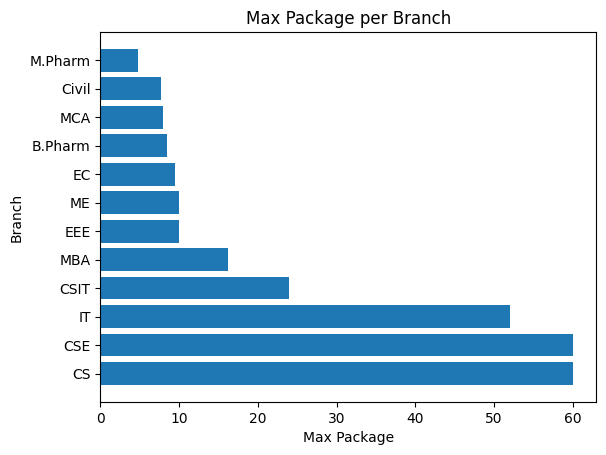

In [434]:
plt.barh(branch_max.index,branch_max.values)
plt.ylabel('Branch')
plt.xlabel('Max Package')
plt.title('Max Package per Branch')

In [435]:
branch_min = df.groupby('Branch')['Package'].min()
branch_min = branch_min.sort_values(ascending=True)
branch_min = branch_min.dropna()
branch_min

,Package
Branch,
CS,1.2
CSE,1.2
EEE,1.2
IT,1.2
ME,1.2
CSIT,1.44
Civil,1.44
MCA,1.44
EC,1.92


Text(0.5, 1.0, 'Min Package per Branch')

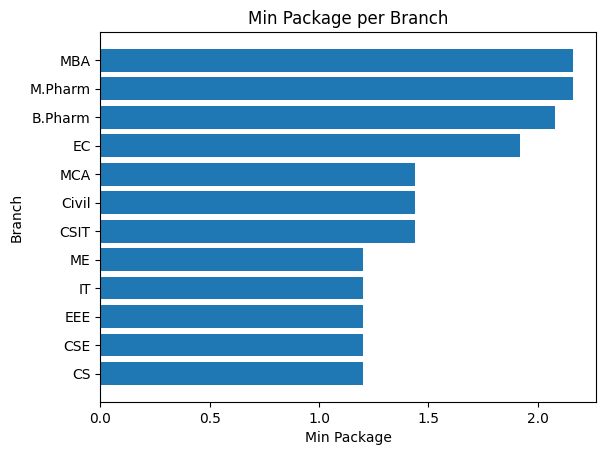

In [436]:
plt.barh(branch_min.index,branch_min.values)
plt.ylabel('Branch')
plt.xlabel('Min Package')
plt.title('Min Package per Branch')

In [437]:
branch_cnt = df.groupby('Branch')['Package'].count().sort_values(ascending=False)
mask = branch_cnt > 0
branch_cnt = branch_cnt[mask]
branch_cnt

,Package
Branch,
CS,173
CSE,168
IT,163
MBA,155
CSIT,149
EC,133
MCA,123
EEE,123
ME,83


Text(0.5, 1.0, 'Total Offers per Branch')

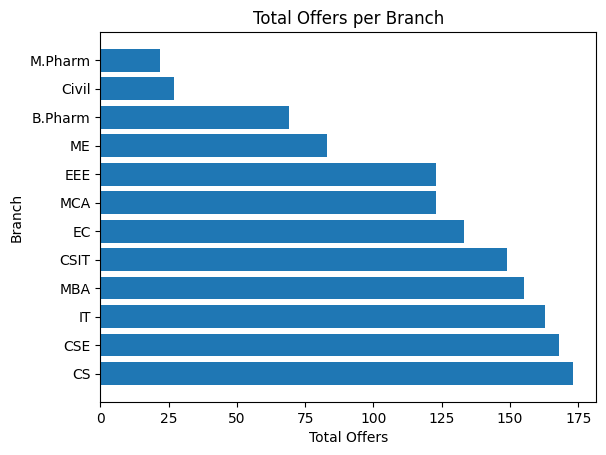

In [438]:
plt.barh(branch_cnt.index,branch_cnt.values)
plt.ylabel('Branch')
plt.xlabel('Total Offers')
plt.title('Total Offers per Branch')

In [ ]:
df_copy = df.copy()

In [440]:
bins = [1, 3, 6, 8, 10, 13.01, 20, 40]
labels = ['1-3 LPA', '3-6 LPA', '6-8 LPA', '8-10 LPA', '10-13 LPA', '13-20 LPA', '20-40 LPA']

df['Package_Group'] = pd.cut(df['Package'], bins=bins, labels=labels, right=False, include_lowest=True)





In [441]:
df['Concise_Package'] = df.apply(
    lambda row: row['Package_Group'] if pd.notna(row['Package_Group']) else row['Package'], axis=1
)

In [442]:
df_copy['Package'] = df['Concise_Package']
df_copy = df.drop('Concise_Package', axis=1)
df_copy = df.drop('Package_Group', axis=1, errors='ignore')
df_concise = df_copy
df = df_copy
df

,Year,Name,Branch,Company,Package,Concise_Package
1,2023-24,ANKITA JAIN,CS,Atlassian,60,60
2,2023-24,AYUSHI GUPTA,CSE,Atlassian,60,60
3,2023-24,ISHA RASTOGI,IT,Microsoft,52,52
4,2023-24,SHIFA RIFAT,IT,ServiceNow,42.67,42.67
5,2023-24,AKANKSHA MISHRA,CS,Flipkart,32.67,20-40 LPA
...,...,...,...,...,...,...
1386,2023-24,RAVINDRA KUMAR CHAURASIYA,ME,Gauri component pvt Ltd,1.2,1-3 LPA
1387,2023-24,KIRTI JAYANT,CS,MetaSquare Technologies Pvt. Ltd.,1.2,1-3 LPA
1388,2023-24,VISHESH AGRAWAL,CSE,PRASHVIT DIGITAL,1.2,1-3 LPA
1389,2023-24,HARSH SAINI,EEE,Shree balaji oil mill,1.2,1-3 LPA


In [443]:
CTC_count = df.groupby('Concise_Package')['Name'].count().sort_values(ascending=False)

CTC_count.name = 'Total Offers'
CTC_count.index.name = 'CTC'
CTC_count

,Total Offers
CTC,
3-6 LPA,863
6-8 LPA,217
1-3 LPA,192
13-20 LPA,43
8-10 LPA,41
10-13 LPA,20
20-40 LPA,8
60,2
52,1


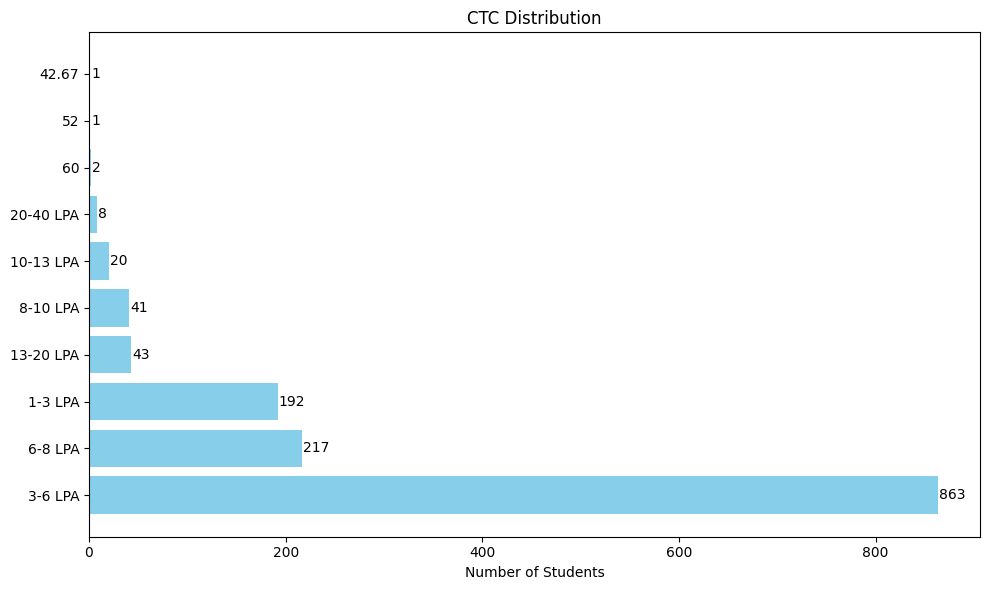

In [444]:
plt.figure(figsize=(10, 6))
bars = plt.barh(CTC_count.index.astype(str), CTC_count.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, str(int(width)), va='center')

plt.xlabel("Number of Students")
plt.title("CTC Distribution")
plt.tight_layout()
plt.show()

In [445]:
df_og.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 1 to 1390
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             1388 non-null   object
 1   Name             1388 non-null   object
 2   Branch           1388 non-null   object
 3   Company          1388 non-null   object
 4   Package          1388 non-null   object
 5   Concise_Package  1388 non-null   object
dtypes: object(6)
memory usage: 108.2+ KB


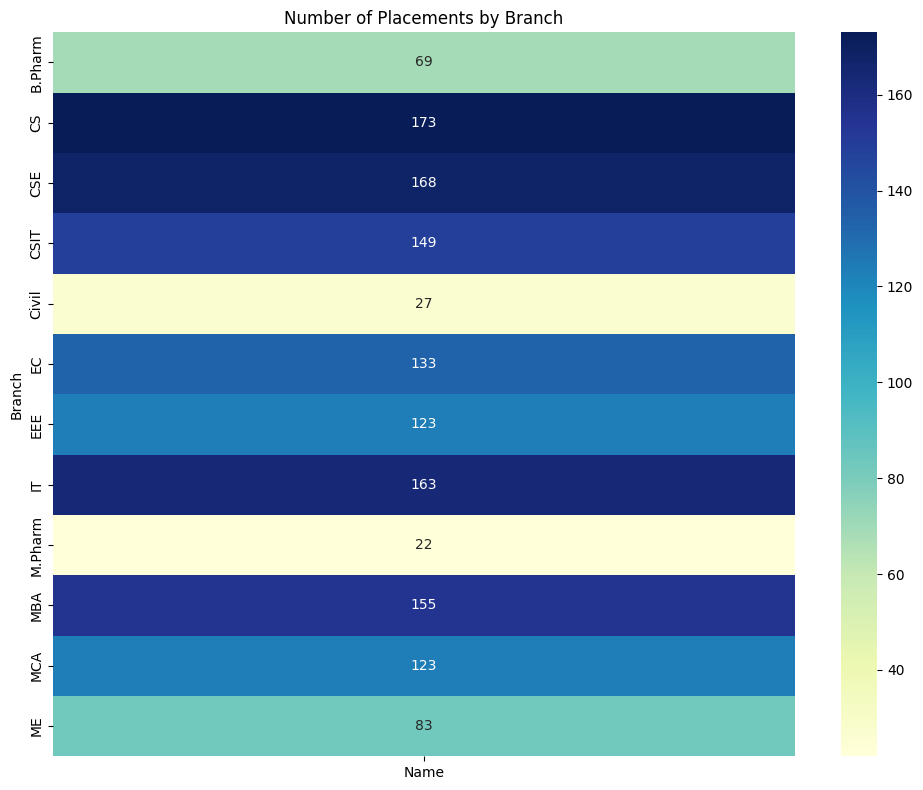

In [522]:
pivot_table = pd.pivot_table(df, index='Branch', values='Name', aggfunc='count', fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Number of Placements by Branch')
plt.tight_layout()
plt.show()

In [504]:
comp_avg = df.groupby('Company')['Package'].mean()
comp_avg = comp_avg.sort_values(ascending=False)
comp_avg

,Package
Company,
Atlassian,60.0
Microsoft,52.0
ServiceNow,42.67
Axtria,24.0
Fractal Analytics,22.0
...,...
Gauri component pvt Ltd,1.2
Shree balaji oil mill,1.2
AGL-HAKUHODO,1.2


In [505]:
mask = comp_avg > 10
comp_avg = comp_avg[mask]
comp_avg

,Package
Company,
Atlassian,60.0
Microsoft,52.0
ServiceNow,42.67
Axtria,24.0
Fractal Analytics,22.0
Fractal Analytics,22.0
Cisco,20.243333
Uddan,20.0
Federal Bank,16.22


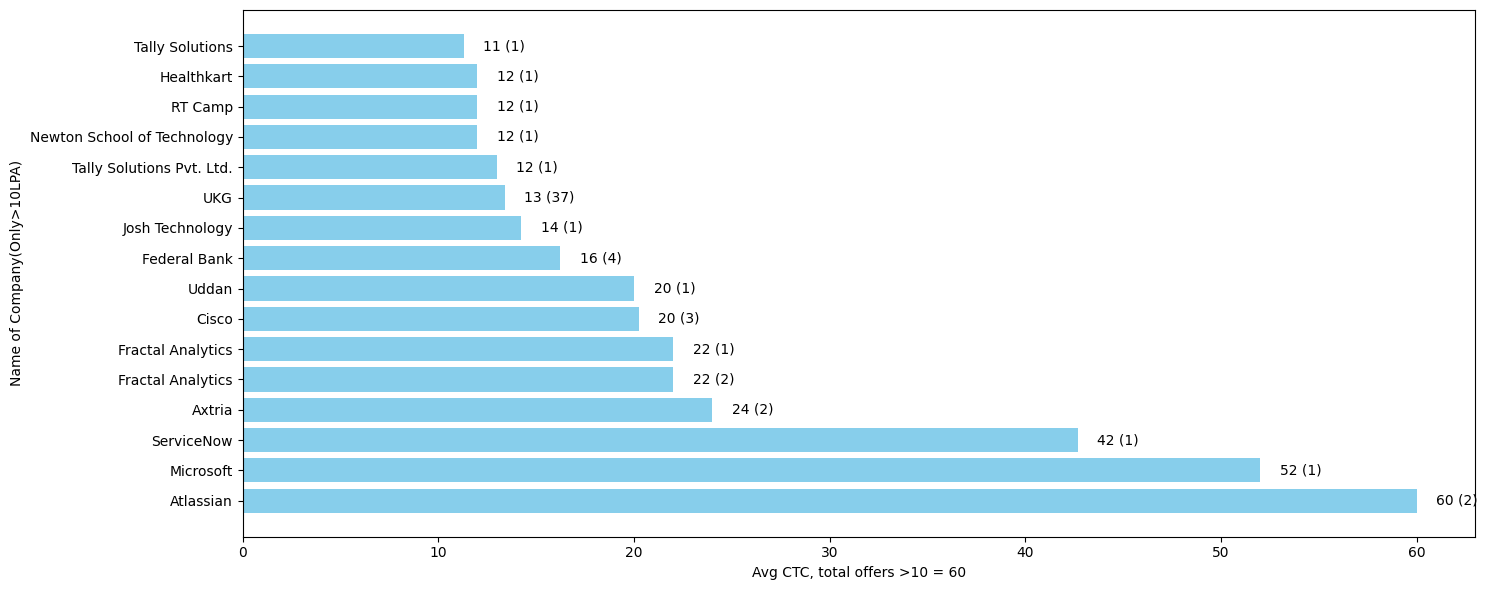

In [519]:
plt.figure(figsize=(15, 6))
bars = plt.barh(comp_avg.index.astype(str), comp_avg.values, color='skyblue')
c = 0
for i, bar in enumerate(bars):
    width = bar.get_width()
    company = comp_avg.index[i]
    total_offers = df[df['Company'] == company]['Name'].count()
    c = c + total_offers
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f"{int(width)} ({total_offers})", va='center')
plt.ylabel("Name of Company(Only>10LPA)")
plt.xlabel(f"Avg CTC, total offers >10 = {c}")
plt.tight_layout()
plt.show()